In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

## 基本使用

#### MATLAB风格接口
Matplotlib 最初作为MATLAB 用户的Python 替代品， 许多语法都和MATLAB 类似。
MATLAB 风格的工具位于pyplot（plt）接口中。MATLAB 用户肯定对下面的代码特别熟
悉

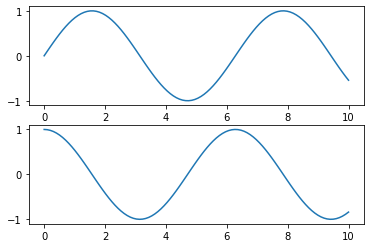

In [2]:
x = np.linspace(0, 10, 100)
# 创建两个子图中的第一个，设置坐标轴
plt.subplot(2, 1, 1) # (行、列、子图编号)
plt.plot(x, np.sin(x))
# 创建两个子图中的第二个，设置坐标轴
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

#### 面向对象接口
面向对象接口可以适应更复杂的场景，更好地控制你自己的图形。在面向对象接口中，画
图函数不再受到当前“活动”图形或坐标轴的限制，而变成了显式的Figure 和Axes 的方
法。通过下面的代码，可以用面向对象接口重新创建之前的图形

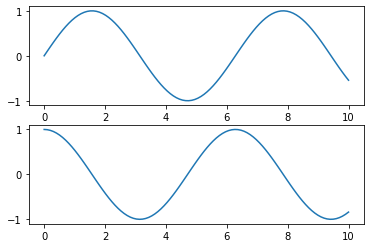

In [3]:
# 先创建图形网格
# ax是一个包含两个Axes对象的数组
fig, ax = plt.subplots(2)

# 在每个对象上调用plot()方法
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

虽然在画简单图形时，选择哪种绘图风格主要看个人喜好，但是在画比较复杂的图形时，
面向对象方法会更方便。

## 线图

#### 基本线图

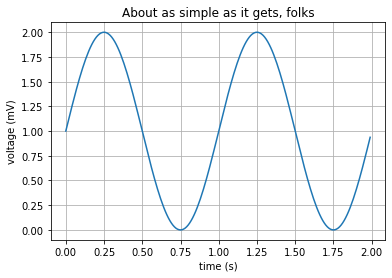

In [4]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

#fig.savefig("test.png")
#plt.show()

#### 一个图中的多个子图

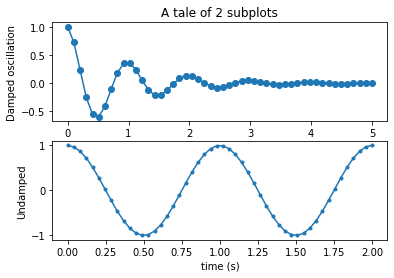

In [5]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

In [6]:
x1.shape,x2.shape

((50,), (50,))

## 直方图

In [7]:
data = np.random.randn(1000)
data.shape

(1000,)

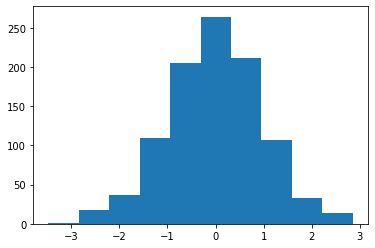

In [8]:

fig, ax = plt.subplots()

ax.hist(data)
plt.show()

## 饼图

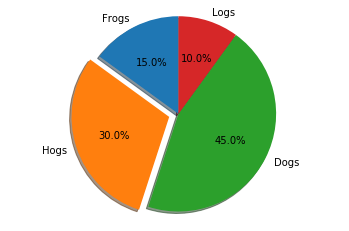

In [9]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## 条形图

<BarContainer object of 5 artists>

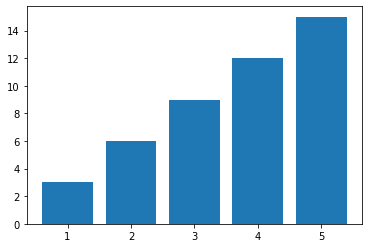

In [10]:
x = np.arange(1,6)

fig, ax = plt.subplots()
ax.bar(x,x*3)

## 散点图

#### 用plt.plot画散点图

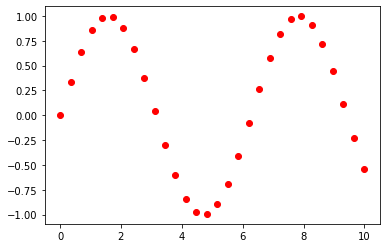

In [11]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

#plt.plot(x, y, 'o', color='black')
fig, ax = plt.subplots()
ax.plot(x, y, 'o', color='red')

#### 用plt.scatter画散点图

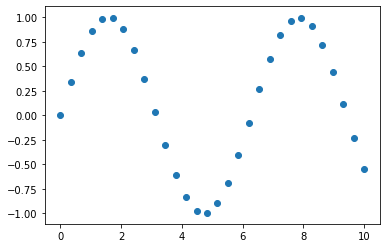

In [12]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

#plt.scatter(x, y)
fig, ax = plt.subplots()
ax.scatter(x, y)

## 等高线
等高线的绘制 —— plt.contour 与 plt.contourf

plt.contourf 与 plt.contour 区别：
```
f：filled，也即对等高线间的填充区域进行填充（使用不同的颜色）；
contourf：将不会再绘制等高线（显然不同的颜色分界就表示等高线本身），
```
为等高线上注明等高线的值：
```
cs = plt.contour(x, y, z)
plt.clabel(cs, inline=1, fontsize=10)
```
增加 colorbar；
```
cb = plt.colorbar()
cb.set_label('meters')
```
默认 colorbar 是竖直放置，通过 orientation 关键字参数，可将其设置为水平放置；
```
cb = plt.colorbar(orientation='horizontal')
```

**contour([X, Y,] Z, [levels], ** kwargs)绘制轮廓。**

参数：
```
X，Y ： array-like，可选
值Z的坐标。
X和Y必须都是2-D，且形状与Z相同，或者它们必须都是1-d，这样len（X）== M是Z中的列数，len（Y）== N是Z中的行数。

Z ： array-like（N，M）
绘制轮廓的高度值。

levels： int或类似数组，可选
确定轮廓线/区域的数量和位置。
如果int Ñ，使用Ñ数据间隔; 即绘制n + 1个等高线。水平高度自动选择。
如果是数组，则在指定的级别绘制轮廓线。值必须按递增顺序排列。
```

In [13]:
# 定义高度函数
def height(x, y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2) * 10

In [14]:
# 生成x,y的数据
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
 
# 把x,y数据生成mesh网格状的数据，因为等高线的显示是在网格的基础上添加上高度值
X, Y = np.meshgrid(x, y)
X.shape, Y.shape

((256, 256), (256, 256))

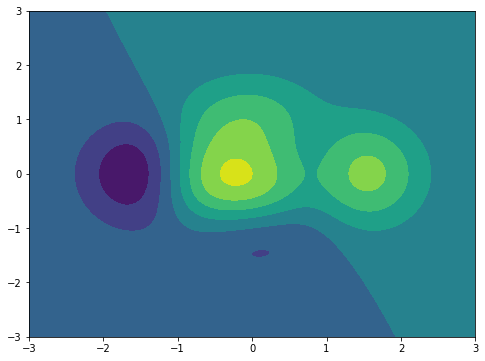

In [15]:
plt.figure(figsize=(8,6))
# 填充等高线中间的区域
plt.contourf(X, Y, height(X, Y))

这颜色有点太冷了，我们想显示热力图，那只要在plt.contourf()函数中添加属性cmap=plt.cm.hot就能显示热力图，其中cmap代表为color map，我们把color map映射成hot(热力图)

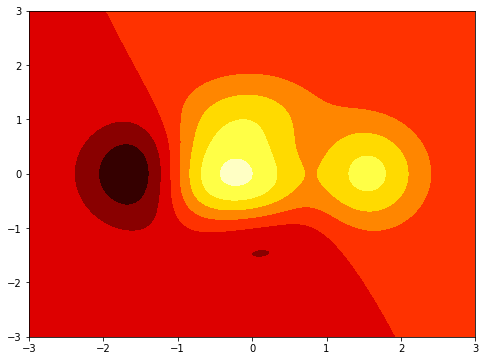

In [16]:
plt.figure(figsize=(8,6))
# 填充等高线中间的区域
plt.contourf(X, Y, height(X, Y), cmap=plt.cm.hot)

上面是用plt.contourf()填充了等高线，但还有一种方式是可以直接显示等高线，而不是填充的方式

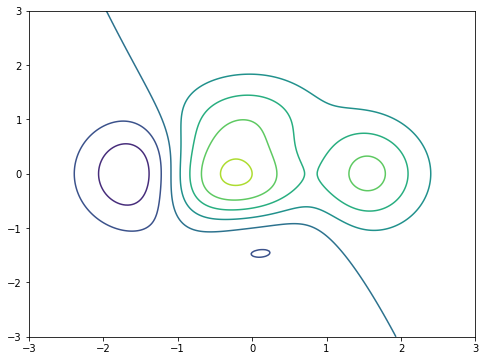

In [17]:
plt.figure(figsize=(8,6))
C = plt.contour(X, Y, height(X, Y))

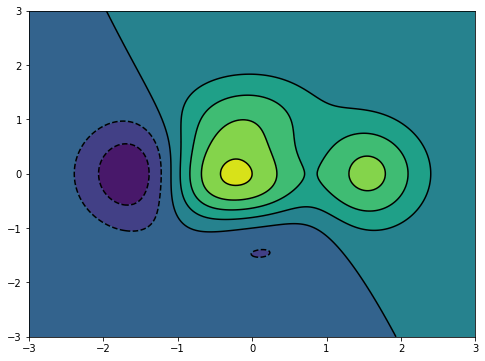

In [18]:
# 一起
plt.figure(figsize=(8,6))
plt.contourf(X, Y, height(X, Y))
C = plt.contour(X, Y, height(X, Y), colors=["black"])

<a list of 8 text.Text objects>

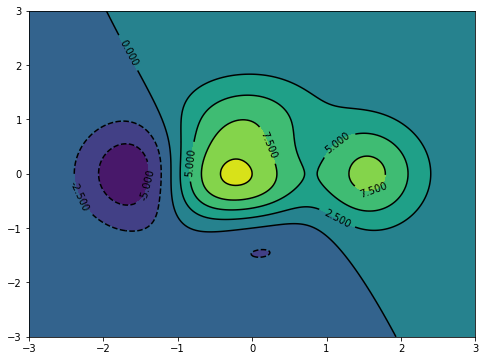

In [19]:
# 一起
plt.figure(figsize=(8,6))
plt.contourf(X, Y, height(X, Y))
C = plt.contour(X, Y, height(X, Y), colors=["black"])
# 显示各等高线的数据标签
plt.clabel(C,inline=True,fontsize=10)

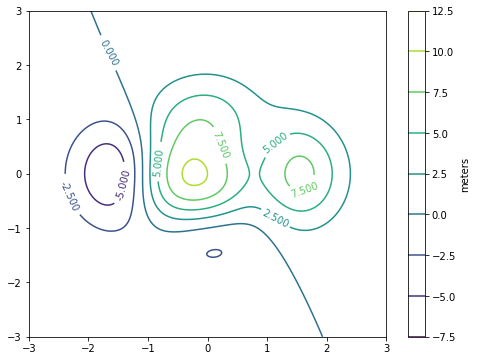

In [20]:
plt.figure(figsize=(8,6))
#plt.contourf(X, Y, height(X, Y))
C = plt.contour(X, Y, height(X, Y))
# 显示各等高线的数据标签
plt.clabel(C,inline=True,fontsize=10)
# 增加 colorbar
cb = plt.colorbar()
cb.set_label('meters')

Text(0.5, 1.0, 'levels=0')

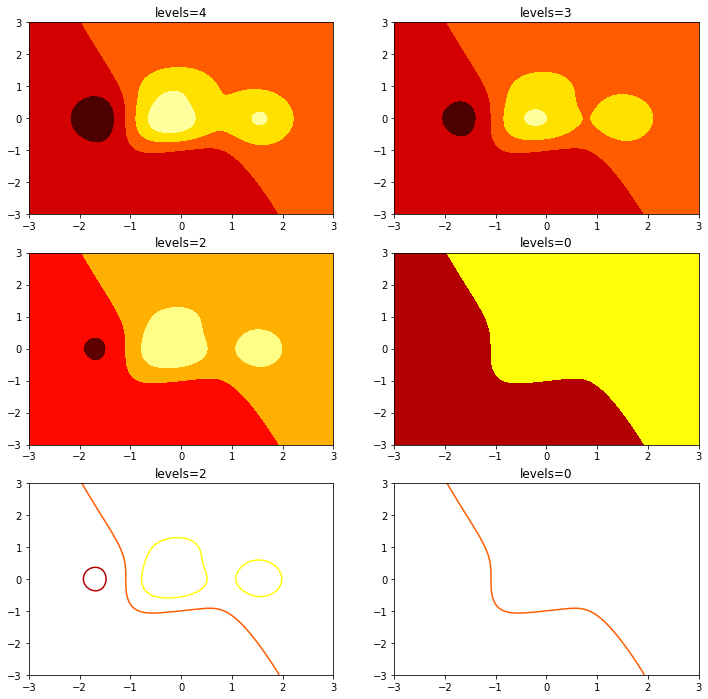

In [21]:
# levels参数：为int型就是分成多少份，0时分成两份
fig,axs = plt.subplots(3,2,figsize=(12, 12))
axs[0,0].contourf(X, Y, height(X, Y), levels=4,cmap=plt.cm.hot)
axs[0,0].set_title("levels=4")
axs[0,1].contourf(X, Y, height(X, Y), levels=3,cmap=plt.cm.hot)
axs[0,1].set_title("levels=3")

axs[1,0].contourf(X, Y, height(X, Y), levels=2,cmap=plt.cm.hot)
axs[1,0].set_title("levels=2")
axs[1,1].contourf(X, Y, height(X, Y), levels=0,cmap=plt.cm.hot)
axs[1,1].set_title("levels=0")

axs[2,0].contour(X, Y, height(X, Y), levels=2,cmap=plt.cm.hot)
axs[2,0].set_title("levels=2")
axs[2,1].contour(X, Y, height(X, Y), levels=0,cmap=plt.cm.hot)
axs[2,1].set_title("levels=0")

Text(0.5, 1.0, 'levels=-3,0,3')

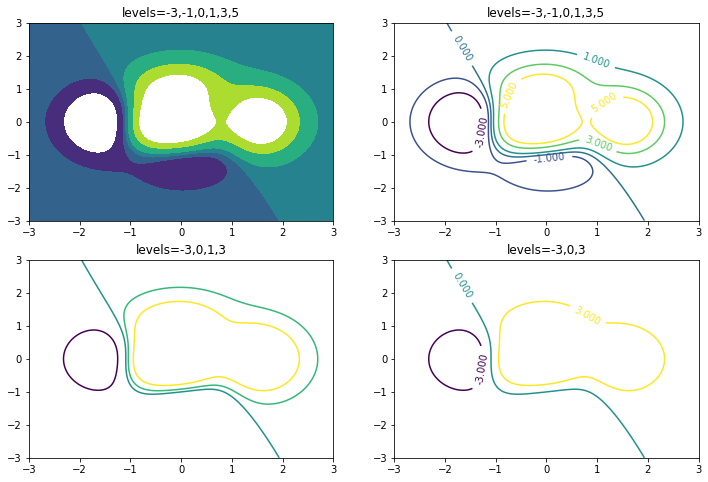

In [22]:
# levels参数：是数组类型则表示，所要画的等高线的值列表。
fig,axs = plt.subplots(2,2,figsize=(12, 8))

levels=[-3,-1, 0, 1, 3, 5]
ax = axs[0,0]
ax.contourf(X, Y, height(X, Y), levels=levels)
ax.set_title("levels="+",".join(map(str,levels)))
ax = axs[0,1]
C = ax.contour(X, Y, height(X, Y), levels=levels)
plt.clabel(C,inline=True,fontsize=10)
ax.set_title("levels="+",".join(map(str,levels)))

levels=[-3, 0, 1, 3]
ax = axs[1,0]
ax.contour(X, Y, height(X, Y), levels=levels)
ax.set_title("levels="+",".join(map(str,levels)))
levels=[-3,-0, 3]
ax = axs[1,1]
C = ax.contour(X, Y, height(X, Y), levels=levels)
plt.clabel(C,inline=True,fontsize=10)
ax.set_title("levels="+",".join(map(str,levels)))

<a list of 5 text.Text objects>

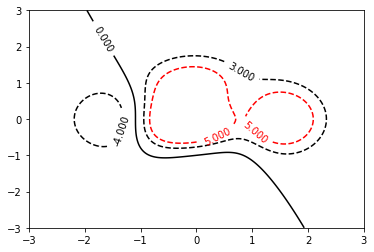

In [23]:
# 设置等高线的样式
C = plt.contour(X, Y, height(X, Y), levels=[-4, 0, 3, 5],
                colors=['k', 'k', 'k','r','r'], linestyles=['--','-', '--','--'])
plt.clabel(C,inline=True,fontsize=10)